# CS4035 - Cyber Data Analytics
## Lab 3 

### Submit on brightspace (zip file with the name Group_xx.zip)
(i) This jupyter file completed with code, plots, figures and report for each question. Additional plots and figures can be created for explanation before the end of each main question. Lab 3 contains 7 main questions, including the bonus. Write the code or explanation below each sub question. For the explantions, include what you would normally include in the report for this lab assignment, for example data pre-processing, hypothesis tested, approach, results, etc.
(ii) A PDF or a Word report for the assignment. Create a report from the plots, figures, tables and the write-up that you provide in this jupyter file. The report will be used as a proof for page limit. 
(iii) The libraries needed to run this file. 

Your peers should be able to use the readme section for instructions and be able to run this file. 

## Group Number :

## Student 1 
### Name : Joost Bambacht
### ID : 4025016

## Student 2
### Name : Lennart Overdevest
### ID : 4374436

## Readme - Provide instructions - libraries used, location of the data file, etc. Keep it short. Remember your peers will not debug your code and should be able to reproduce the exact output you provide.

1. pip3 install -r requirements.txt
2. Download the following datasets and place in folder 'data':
[Scenario 9](https://mcfp.felk.cvut.cz/publicDatasets/CTU-Malware-Capture-Botnet-50/detailed-bidirectional-flow-labels/capture20110817.binetflow)
[Scenario 10](https://mcfp.felk.cvut.cz/publicDatasets/CTU-Malware-Capture-Botnet-51/detailed-bidirectional-flow-labels/capture20110818.binetflow)
[Scenario 11](https://mcfp.felk.cvut.cz/publicDatasets/CTU-Malware-Capture-Botnet-52/detailed-bidirectional-flow-labels/capture20110818-2.binetflow)
[Scenario 12](https://mcfp.felk.cvut.cz/publicDatasets/CTU-Malware-Capture-Botnet-53/detailed-bidirectional-flow-labels/capture20110819.binetflow)

## 1. Familiarization and discretization task – 1 A4

### 1a. Plot visualizations - Select and visualize two features for modeling the behavior of the infected host.

In [2]:
%reset -f
%load_ext autoreload
%autoreload 2

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import familiarization as fam

import warnings
warnings.filterwarnings('ignore')

# Read, process and divide data
data = fam.load_data("data/capture20110818.binetflow.txt")
pdata = fam.pre_process(data)
infected_hosts = pdata.loc[pdata["Infected"] == 1]
non_infected_hosts = pdata.loc[pdata["Infected"] == 0]

# Compare statistics for infected and non-infected hosts
## Average Duration
duration_infected = np.mean(infected_hosts["Duration"])
duration_non_infected = np.mean(non_infected_hosts["Duration"])

## Protocol
protocols_infected = infected_hosts.Protocol.value_counts(normalize=True)
protocols_non_infected = non_infected_hosts.Protocol.value_counts(normalize=True)

## Average TotalPackets
packets_infected = np.mean(infected_hosts.TotalPackets)
packets_non_infected = np.mean(non_infected_hosts.TotalPackets)

## Average TotalBytes
bytes_infected = np.mean(infected_hosts.TotalBytes)
bytes_non_infected = np.mean(non_infected_hosts.TotalBytes)

## Average SourceBytes
source_bytes_infected = np.mean(infected_hosts.SourceBytes)
source_bytes_non_infected = np.mean(non_infected_hosts.SourceBytes)

print("Infected hosts")
print(" Duration:", duration_infected)
print(" Average Packets",packets_infected)
print(" Average Bytes",bytes_infected)
print(" Source Bytes",source_bytes_infected)
print(" Protocols: \n",protocols_infected)

print("\n")
print("Non-Infected hosts")
print(" Duration:", duration_non_infected)
print(" Average Packets",packets_non_infected)
print(" Average Bytes",bytes_non_infected)
print(" Source Bytes",source_bytes_non_infected)
print(" Protocols: \n",protocols_non_infected)

# Visualize protocols used to show difference between infected and non-infected hosts
protocol_grouped = pdata.groupby('Infected')['Protocol'].value_counts(normalize=True)
protocol_grouped = protocol_grouped.mul(100)
protocol_grouped = protocol_grouped.rename('percent').reset_index()

print()
print("Figure 1: Difference in distribution for infected and non-infected hosts")
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.barplot(x='Protocol',y='percent',hue='Infected',data=protocol_grouped)
ax.set_title("Protocols used for infected and non-infected hosts",size=16)
ax.set_ylabel("Percentage",size=14)
ax.set_xlabel("Protocols",size=14)
plt.show()

/Users/lennartoverdevest/miniconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


Infected hosts
 Duration: 90.82559153096321
 Average Packets 30.315330224161276
 Average Bytes 27129.65718557244
 Source Bytes 27121.20417105461
 Protocols: 
 ICMP    0.996474
UDP     0.002755
TCP     0.000771
Name: Protocol, dtype: float64


Non-Infected hosts
 Duration: 46.585669888622455
 Average Packets 35.74916387959866
 Average Bytes 27199.363854357292
 Source Bytes 1660.3409478134663
 Protocols: 
 UDP     0.617152
TCP     0.337162
ICMP    0.044993
ARP     0.000694
Name: Protocol, dtype: float64

Figure 1: Difference in distribution for infected and non-infected hosts


<Figure size 1000x600 with 1 Axes>

### 1b. Discretize selected features

Figure 2: Optimal number of bins for feature Protocol of infected host 147.32.84.205


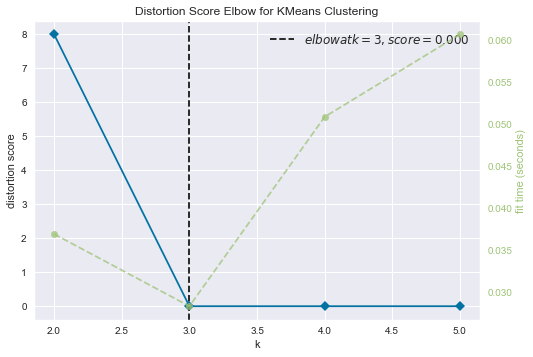

Figure 3: Optimal number of bins for feature Duration of infected host 147.32.84.205


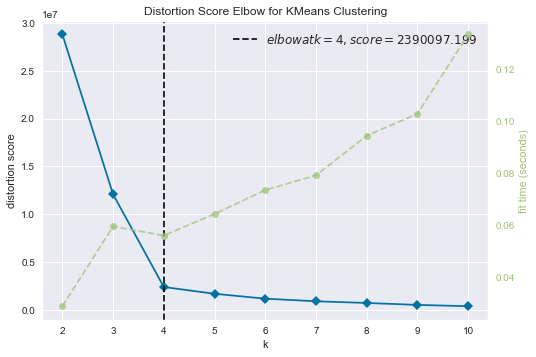

Figure 4: Discretized Protocol and Duration features for an infected and non-infected host


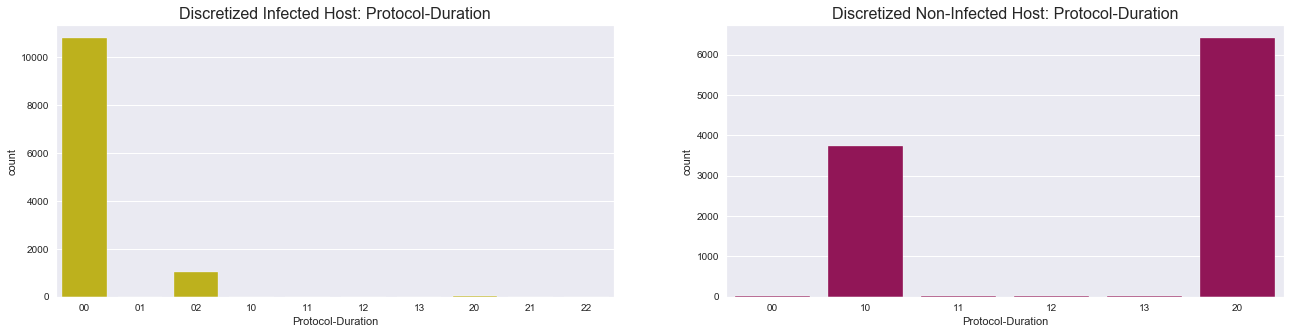

Figure 5: Discretized Protocol and Duration features for all infected and non-infected hosts


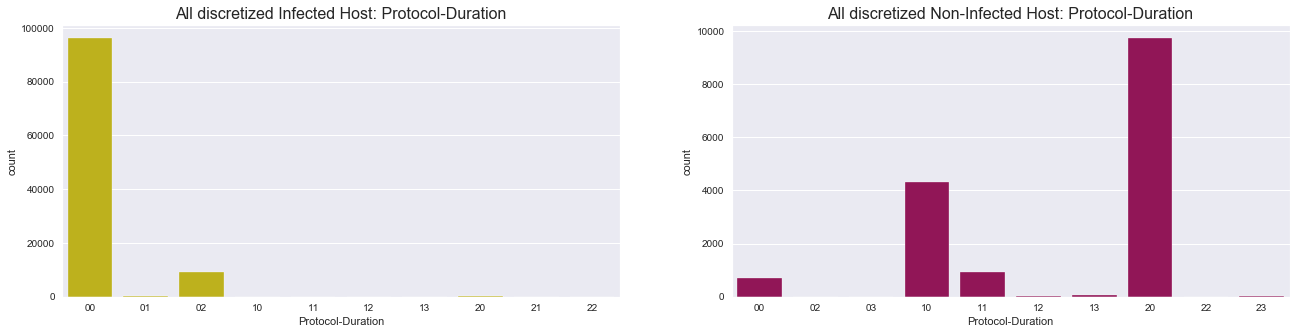

In [2]:
# Encode protocol names
pdata["Protocol"] = fam.encode_feature(pdata["Protocol"])
print(pdata)

# Select all infected and non-infected hosts
infected_hosts = pdata.loc[pdata["Infected"] == 1]
non_infected_hosts = pdata.loc[pdata["Infected"] == 0]

# Select infected host with most entries in dataset
infected_host = pdata.loc[pdata["SourceAddress"] == fam.select_infected_host(pdata)]
non_infected_host = pdata.loc[pdata["SourceAddress"] == fam.select_non_infected_host(pdata)]

# Apply Elbow method to find optimal number of bins
features = ["Protocol","Duration"]
# for feature in features:
#     print("Figure "+str(features.index(feature)+2)+": Optimal number of bins for feature "+feature+" of infected host "+fam.select_infected_host(pdata))
#     fam.elbow(infected_host,feature)

# Optimal number of bins for Protocol and Duration feature
nbins = [3,4]

# Descretization of one infected/non-infected host
discretized_infected = pd.DataFrame()
discretized_non_infected = pd.DataFrame()


for feature, nbin in zip(features,nbins):
    discretized_infected[feature], binsedges_infected = fam.discretize_feature(infected_host, feature, nbin, "kmeans")
    discretized_non_infected[feature], binsedges_non_infected = fam.discretize_feature(non_infected_host, feature, nbin, "kmeans")

discretized_infected["Protocol-Duration"] = discretized_infected.apply(lambda row : fam.concatenate_columns(row["Protocol"], row["Duration"]), axis=1)
discretized_non_infected["Protocol-Duration"] = discretized_non_infected.apply(lambda row : fam.concatenate_columns(row["Protocol"], row["Duration"]), axis=1)

print("Figure 4: Discretized Protocol and Duration features for an infected and non-infected host")
fig, (ax1, ax2) = plt.subplots(ncols=2,figsize=(22,5))
sns.countplot(x="Protocol-Duration", data=discretized_infected, color="y", ax=ax1)
sns.countplot(x="Protocol-Duration", data=discretized_non_infected, color="m", ax=ax2)
ax1.set_title("Discretized Infected Host: Protocol-Duration", size=16)
ax2.set_title("Discretized Non-Infected Host: Protocol-Duration", size=16)
plt.show()

# Discretization of all hosts
discretized_infected_all = pd.DataFrame()
discretized_non_infected_all = pd.DataFrame()
discretized_non_infected_all['SourceAddress'] = non_infected_hosts['SourceAddress']
discretized_non_infected_all['DestinationAddress'] = non_infected_hosts['DestinationAddress']

discretized_infected_all['SourceAddress'] = infected_hosts['SourceAddress']
discretized_infected_all['DestinationAddress'] = infected_hosts['DestinationAddress']
for feature, nbin in zip(features,nbins):
    discretized_infected_all[feature], binsedges_infected = fam.discretize_feature(infected_hosts, feature, nbin, "kmeans")
    discretized_non_infected_all[feature], binsedges_non_infected = fam.discretize_feature(non_infected_hosts, feature, nbin, "kmeans")

discretized_infected_all["Protocol-Duration"] = discretized_infected_all.apply(lambda row : fam.concatenate_columns(row["Protocol"], row["Duration"]), axis=1)
discretized_non_infected_all["Protocol-Duration"] = discretized_non_infected_all.apply(lambda row : fam.concatenate_columns(row["Protocol"], row["Duration"]), axis=1)

print("Figure 5: Discretized Protocol and Duration features for all infected and non-infected hosts")
fig, (ax1, ax2) = plt.subplots(ncols=2,figsize=(22,5))
sns.countplot(x="Protocol-Duration", data=discretized_infected_all, color="y", ax=ax1)
sns.countplot(x="Protocol-Duration", data=discretized_non_infected_all, color="m", ax=ax2)
ax1.set_title("All discretized Infected Host: Protocol-Duration", size=16)
ax2.set_title("All discretized Non-Infected Host: Protocol-Duration", size=16)
plt.show()

### 1b. Answers and explanation

Stream data is a continous flow of data that builds up rapidly. To be able to process and quickly judge the individual flows, discretization can be applied. Discretization breaks the very high number of degrees of freedom for each feature into small groups/categories/bins such that is easier to understand and process the data. Another advantage of discretization is that not every model is able to work with continuous data. For each feature the values are split into a number of bins (N). Bins can be filled according to multiple methods: uniform, quantile and kmeans. Some data is more suitable for one method than the other, e.g. kmeans is good applicable if the data consists of several clusters and uniform (equal-width bins) if the data is equally distributed.

After processing the data the first thing to find out is which features are most suitable for discretization. Looking at the numbers we quickly see that the duration, sourcebytes, and protocols (see Figure 1) are quite different between the infected and non-infected flows. After further investigation we find that the protocol and duration feature looks most promising. For the infected hosts almost all flow uses the ICMP protocol, while the non-infected hosts mostly use UDP and TCP. The duration of a flow for infected hosts is almost twice as long as for non-infected hosts. There is not really a suitable plot method to visualize the difference for the duration feature.

To find out the optimal number of bins to use for descretization we can apply the Elbow method [1]. We select an infected and non-infected host to discretize the features. Before we can apply this method, the protocol feature must be encoded in numerical values. After applying the Elbow method we obtain that the protocol feature is optimal with 3 bins and the duration feature with 4 bins (see Figure 2,3). We can now descritize both features with the obtained bin sizes. Afterwards, we can concatenate both discrete values for both features to obtain a single discrete value (see Figure 4). We see that for the infected host almost all values are '00' and for the non-infected host '10' and '20' are most popular. In Figure 5 we have applied the same discretization on all hosts in the dataset. The results are almost the same, although the non-infected flows also include some other discrete values.

We can thus clearly see the effect on discretization, which can easily and quite fast be implemented to be used for infection detection. For every incoming flow both features can be discretized and concatenated to be able to make a judgement on the infection status. However, this does not directly mean that if the discretized features results in a value of '00' the host is infected. Discretization should be combined with more features or more separate discretized features to be able to make a judgement with a higher success rate.

[1] Learning Behavioral Fingerprints From Netflows Using Timed Automata. Gaetano Pellegrino, Qin Lin, Christian Hammerschmidt and Sicco Verwer

## 2. Frequent task – 1/2 A4 (Individual) - Lennart

### 2a. Use the SPACE SAVING algorithm

In [3]:
from sklearn.preprocessing import LabelEncoder
import spacesaving as sp
print('\033[1m' + "Frequencies(top 10) n-grams non-infected hosts" + '\033[0m')

# Encode the discretized data from task1, such that we have one single value for the n-grams(e.g '00' => 0, '02' => 1)
le = LabelEncoder()
discretized_non_infected_all['single_decretization'] = le.fit_transform(discretized_non_infected_all["Protocol-Duration"])

# Compute ngram frequencies using 10, 20 and 30 counters
ngram_frequencies_10 = sp.SpaceSaving(discretized_non_infected_all['single_decretization'], 10)    
ngram_frequencies_20 = sp.SpaceSaving(discretized_non_infected_all['single_decretization'], 20)    
ngram_frequencies_30 = sp.SpaceSaving(discretized_non_infected_all['single_decretization'], 30) 

ngram_frequencies_original = sp.ActualFrequency(discretized_non_infected_all['single_decretization']) 

# Create dictionary only containing top 10 most frequent n-grams(dictionary already sorted in decreasing value order)
top_ten_items = ngram_frequencies_original.items()

top_ten = {}
counter = 0
for k, v in ngram_frequencies_original.items():
    if counter < 10:
        top_ten[k] = v
    counter += 1

df_10 = pd.DataFrame()
df_10['Top 10 3-gram'] = top_ten.keys()
df_10['Count'] = top_ten.values()
df_10['Top 10 3-gram approximated'] =  ngram_frequencies_10.keys()
df_10['Approximation SpaceSaving'] = ngram_frequencies_10.values()
df_10['Accuracy'] = np.where((df_10['Top 10 3-gram'] == df_10['Top 10 3-gram approximated'])
                     , df_10['Approximation SpaceSaving'] / df_10['Count'], "-")

df_10.head(10)

Frequencies(top 10) n-grams non-infected hosts


,Top 10 3-gram,Count,Top 10 3-gram approximated,Approximation SpaceSaving,Accuracy
0,777,3474,777,3478,1.0011514104778354
1,773,2496,773,2496,1.0
2,377,2360,377,2361,1.0004237288135593
3,737,2058,737,2060,1.000971817298348
4,333,1148,333,1178,1.0261324041811846
5,774,432,000,971,-
6,477,407,007,826,-
7,337,359,070,825,-
8,733,341,700,825,-
9,747,337,077,825,-


In [4]:
top_twenty = {}
counter = 0
for k, v in ngram_frequencies_original.items():
    if counter < 20:
        top_twenty[k] = v
    counter += 1

df_20 = pd.DataFrame()
df_20['Top 20 3-gram'] = top_twenty.keys()
df_20['Count'] = top_twenty.values()
df_20['Top 20 3-gram approximated'] =  ngram_frequencies_20.keys()
df_20['Approximation SpaceSaving'] = ngram_frequencies_20.values()
df_20['Accuracy'] = np.where((df_20['Top 20 3-gram'] == df_20['Top 20 3-gram approximated'])
                     , df_20['Approximation SpaceSaving'] / df_20['Count'], "-")
df_20.head(10)


,Top 20 3-gram,Count,Top 20 3-gram approximated,Approximation SpaceSaving,Accuracy
0,777,3474,777,3475,1.0002878526194587
1,773,2496,773,2496,1.0
2,377,2360,377,2360,1.0
3,737,2058,737,2058,1.0
4,333,1148,333,1150,1.0017421602787457
5,774,432,774,433,1.0023148148148149
6,477,407,477,408,1.0024570024570025
7,337,359,000,401,-
8,733,341,337,361,-
9,747,337,733,343,-


In [5]:
top_thirty = {}
counter = 0
for k, v in ngram_frequencies_original.items():
    if counter < 30:
        top_thirty[k] = v
    counter += 1

df_30 = pd.DataFrame()
df_30['Top 30 3-gram'] = top_thirty.keys()
df_30['Count'] = top_thirty.values()
df_30['Top 30 3-gram approximated'] =  ngram_frequencies_30.keys()
df_30['Approximation SpaceSaving'] = ngram_frequencies_30.values()
df_30['Accuracy'] = np.where((df_30['Top 30 3-gram'] == df_30['Top 30 3-gram approximated'])
                     , df_30['Approximation SpaceSaving'] / df_30['Count'], "-")
df_30.head(10)

,Top 30 3-gram,Count,Top 30 3-gram approximated,Approximation SpaceSaving,Accuracy
0,777,3474,777,3474,1.0
1,773,2496,773,2496,1.0
2,377,2360,377,2360,1.0
3,737,2058,737,2058,1.0
4,333,1148,333,1149,1.0008710801393728
5,774,432,774,432,1.0
6,477,407,477,407,1.0
7,337,359,337,360,1.0027855153203342
8,733,341,000,354,-
9,747,337,733,342,-


In [6]:
from sklearn.preprocessing import LabelEncoder
import spacesaving as sp
print('\033[1m' + "Frequencies n-grams infected hosts" + '\033[0m')

# Encode the discretized data from task1, such that we have one single value for the n-grams(e.g '00' => 0, '02' => 1)
le = LabelEncoder()
discretized_infected_all['single_decretization'] = le.fit_transform(discretized_infected_all["Protocol-Duration"])

# Compute ngram frequencies using 10, 20 and 30 counters
ngram_frequencies_infected_10 = sp.SpaceSaving(discretized_infected_all['single_decretization'], 10)    
ngram_frequencies_infected_20 = sp.SpaceSaving(discretized_infected_all['single_decretization'], 20)    
ngram_frequencies_infected_30 = sp.SpaceSaving(discretized_infected_all['single_decretization'], 30) 

ngram_frequencies_infected_original = sp.ActualFrequency(discretized_infected_all['single_decretization']) 

# Create dictionary only containing top 10 most frequent n-grams(dictionary already sorted in decreasing value order)
top_ten_infected = {}
counter = 0
for k, v in ngram_frequencies_infected_original.items():
    if counter < 10:
        top_ten_infected[k] = v
    counter += 1

df_infected_10 = pd.DataFrame()
df_infected_10['Top 10 3-gram'] = top_ten_infected.keys()
df_infected_10['Count'] = top_ten_infected.values()
df_infected_10['Top 10 3-gram approximated'] =  ngram_frequencies_infected_10.keys()
df_infected_10['Approximation SpaceSaving'] = ngram_frequencies_infected_10.values()
df_infected_10['Accuracy'] = np.where((df_infected_10['Top 10 3-gram'] == df_infected_10['Top 10 3-gram approximated'])
                     , df_infected_10['Approximation SpaceSaving'] / df_infected_10['Count'], "-")
df_infected_10.head(10)



Frequencies n-grams infected hosts


,Top 10 3-gram,Count,Top 10 3-gram approximated,Approximation SpaceSaving,Accuracy
0,000,79410,000,79420,1.000125928724342
1,020,7736,020,7746,1.0012926577042398
2,002,7700,002,7710,1.0012987012987014
3,200,7694,200,7703,1.0011697426566155
4,202,786,202,802,1.020356234096692
5,220,758,220,772,1.0184696569920844
6,022,757,022,771,1.0184940554821664
7,010,302,373,476,-
8,100,293,073,475,-
9,001,285,737,475,-


In [7]:
top_twenty_infected = {}
counter = 0
for k, v in ngram_frequencies_infected_original.items():
    if counter < 20:
        top_twenty_infected[k] = v
    counter += 1

df_infected_20 = pd.DataFrame()
df_infected_20['Top 20 3-gram'] = top_twenty_infected.keys()
df_infected_20['Count'] = top_twenty_infected.values()
df_infected_20['Top 20 3-gram approximated'] =  ngram_frequencies_infected_20.keys()
df_infected_20['Approximation SpaceSaving'] = ngram_frequencies_infected_20.values()
df_infected_20['Accuracy'] = np.where((df_infected_20['Top 20 3-gram'] == df_infected_20['Top 20 3-gram approximated'])
                     , df_infected_20['Approximation SpaceSaving'] / df_infected_20['Count'], "-")
df_infected_20.head(10)

,Top 20 3-gram,Count,Top 20 3-gram approximated,Approximation SpaceSaving,Accuracy
0,000,79410,000,79412,1.0000251857448683
1,020,7736,020,7738,1.0002585315408479
2,002,7700,002,7702,1.0002597402597402
3,200,7694,200,7696,1.0002599428125811
4,202,786,202,789,1.0038167938931297
5,220,758,220,761,1.0039577836411608
6,022,757,022,759,1.0026420079260239
7,010,302,010,306,1.0132450331125828
8,100,293,100,298,1.0170648464163823
9,001,285,001,289,1.0140350877192983


In [8]:
top_tirthy_infected = {}
counter = 0
for k, v in ngram_frequencies_infected_original.items():
    if counter < 30:
        top_tirthy_infected[k] = v
    counter += 1
    
    
df_infected_30 = pd.DataFrame()
df_infected_30['Top 30 3-gram'] = top_tirthy_infected.keys()
df_infected_30['Count'] = top_tirthy_infected.values()
df_infected_30['Top 30 3-gram approximated'] =  ngram_frequencies_infected_30.keys()
df_infected_30['Approximation SpaceSaving'] = ngram_frequencies_infected_30.values()
df_infected_30['Accuracy'] = np.where((df_infected_30['Top 30 3-gram'] == df_infected_30['Top 30 3-gram approximated'])
                     , df_infected_30['Approximation SpaceSaving'] / df_infected_30['Count'], "-")
df_infected_30.head(10)

,Top 30 3-gram,Count,Top 30 3-gram approximated,Approximation SpaceSaving,Accuracy
0,000,79410,000,79411,1.0000125928724342
1,020,7736,020,7737,1.000129265770424
2,002,7700,002,7701,1.0001298701298702
3,200,7694,200,7695,1.0001299714062906
4,202,786,202,787,1.0012722646310432
5,220,758,220,759,1.0013192612137203
6,022,757,022,758,1.0013210039630118
7,010,302,010,303,1.0033112582781456
8,100,293,100,294,1.0034129692832765
9,001,285,001,286,1.0035087719298246


### 2b. Analysis and answers to the questions

In spacesaving.py the implementation of the SpaceSaving algorithm can be found. The SpaceSaving algorithm is used to approximate the distributions over 3-grams of the discretized symbols. As can be seen in task 1, the Protocol and Duration feature are discretized into a single value. 

The top 10 3-grams are approximate for two datasets. The first dataset only contains non-infected hosts and the other data set contains only infected hosts. To test the influence of the number of counters used, the algorithm is run using 10, 20, and 30 number of counters.

Above the results are listed. For each result, the top 10 n-grams with their real count are shown. Next to that, the top 10 n-grams found by the SpaceSaving algorithm and their approximate count are listed. And the last row represents the accuracy ratio (approximate count / real count), computed if and only if, the n-gram is listed at the same position otherwise the counts of different n-grams are compared.

For the infected data set, the algorithm performs very accurate. 000 is the most occurring n-gram and has occurred ten times more than the second most occurring n-gram. As can be seen in the results, the top 10 n-grams are almost perfectly approximated. The number of counters used does have an impact on detecting the most frequent n-grams. When 10 counters are used, we are only able to perfectly match the top 6 most frequent n-grams. When a larger number of counters is used this number increases.

The results of the approximation of the n-grams in the non-infected data set are slightly worse compared to the infected dataset since the last n-grams are not ranked according to the real counting. The reason for this is that this data set is more varied. In this data set, the n-gram 777 is the most occurring n-gram. From the results concluded could be, that the SpaceSaving algorithm is a good method to approximate the most frequent elements. 

The approximation errors could be explained using the mathematical theory as explained in the slides. As defined in the slides "Any item x whose true count > m/k is stored" where m is the sum of the counters and k the number of counters. This can easily be checked, using the following lines of code:

In [9]:
k = 30
m = sum(df_infected_30['Approximation SpaceSaving'])
checkValue = m / k
# Check for each ngram if frequency is greater than m/k than it must be in the list of approximated frequencies of ngrams
for key,value in ngram_frequencies_infected_original.items():
    if value > checkValue and key not in list(df_infected_30['Top 30 3-gram approximated']):
        print("This can not be the case")
print("Every item x whose true count > m/k is stored")

Every item x whose true count > m/k is stored


Above it can be seen that every item that occurs more than m/k is included. Approximation errors could occur when, for example, the last item in the stream only occurs once. In the end, the last n-gram will be replace the value with the loweset minimun counter value. However, this n-gram only occurred one time while the value with the minimum counter value could be way higher. This is one example of how approximation errors could occur. However the approximation is upper bounded by m/k, therefore this approach is an interesting way of approximating distributions of data using limited memory.

## 3. Sketching task – 1/2 A4 (Individual) - Joost

### 3a. COUNT-MIN sketch


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


Figure 6: the number of false positives for different widths and depths


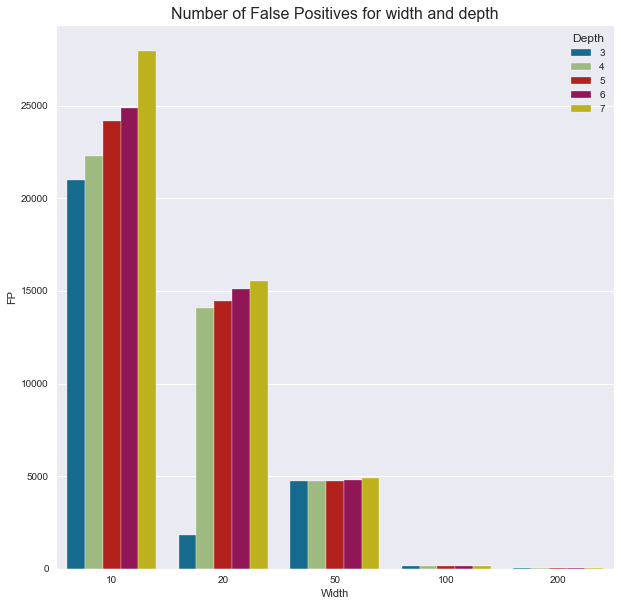

,Trigram,CM,Count,Extra_Frequency
Top,,,,
0,000,105686,105557,100.122
1,222,3442,3442,100
2,221,2943,2943,100
3,122,3142,2824,111.261
4,212,2468,2468,100
5,111,1637,1637,100
6,211,632,542,116.605
7,112,531,531,100
8,002,416,416,100


In [4]:
# %reset -f
# %load_ext autoreload
# %autoreload 2

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import sketching as sketch
import math

data = sketch.load_data("data/capture20110818.binetflow")
pdata = sketch.pre_process(data)

# We first discretize the values for the features we selected in the discretization task. 
# We then make trigrams 
# Optimal number of bins for source address, based on elbow method
nbin_source_address = 3

# Discretize the protocol values (after encoding them first)
discretized = pd.DataFrame()
discretized["SourceAddress"] = pdata['SourceAddress'].copy()
discretized["Protocol"] = sketch.encode_feature(pdata["Protocol"])
discretized["Protocol"], binsedges_infected = sketch.discretize_feature(discretized, "Protocol", nbin_source_address, "kmeans")

# Create 3-grams based on the descretized protocol and of its two predecessors
discretized["trigram"] = 0
discretized.trigram.iloc[0] = str(discretized.Protocol.iloc[0])+""+str(discretized.Protocol.iloc[0])+""+str(discretized.Protocol.iloc[0])
discretized.trigram.iloc[1] = str(discretized.Protocol.iloc[0])+""+str(discretized.Protocol.iloc[0])+""+str(discretized.Protocol.iloc[1])

for i in range(2,len(discretized)):
    discretized.trigram.iloc[i] = str(discretized.Protocol.iloc[i-2])+""+str(discretized.Protocol.iloc[i-1])+""+str(discretized.Protocol.iloc[i])

# Define possible values for error probability (δ) and error factor (ε).
# Higher width and depth implies a lower error.
deltas = [0.05, 0.025, 0.01, 0.0025, 0.001]
epsilons = [0.1, 0.05, 0.02, 0.01, 0.005]
combinations = [(i, j) for i in deltas for j in epsilons]

results = pd.DataFrame(columns=["Width","Depth","Delta","Epsilon","Trigram","CM","Count", "FP"])

# For each combination of delta and epsilon the sketch is computed
for delta, epsilon in combinations:
    # Calculate the width (possible values) and depth (hash functions)
    width = (int) (1/epsilon)
    depth = round((math.log(1/delta)))
    hash_values = [[0]*width]*depth

    # Compute the sketch by increasing the value for the corresponding hash function by one for each 3-gram
    for trigram in discretized.trigram:
        for i in range(depth):
            hash_values[i][sketch.hash_function(trigram,i,width)] += 1
    
    # For each unique trigram the number of COUNT-MIN value is computed and saved for evaluation
    for value in discretized.trigram.unique():
        hashes = [sketch.hash_function(value,x,width) for x in range(depth)]
        values = [0]*depth

        for h in range(depth):
            values[h] = hash_values[h][hashes[h]]
            
        fp = np.min(values)-len(discretized.loc[discretized["trigram"] == value])
        results = results.append({"Width": width, "Depth": depth, "Delta": delta,"Epsilon": epsilon,"Trigram": value,"CM": np.min(values),"Count": len(discretized.loc[discretized["trigram"] == value]), "FP": fp}, ignore_index=True)
        
# Group the results for the FP count
grouped_results = results.groupby(['Width','Depth']).agg({'FP':'sum'}).reset_index()

# Plot the results for each combination of width and depth
print("Figure 6: the number of false positives for different widths and depths")
fig,ax = plt.subplots(figsize=(10,10))
sns.barplot(x="Width",y="FP",hue="Depth",data=results, ci=None, ax=ax)
ax.set_title("Number of False Positives for width and depth", size=16)
plt.show()

# Choose a suitable width and depth based on the results and obtain the frequencies for the top10 3-grams
filter_results = results.loc[(results["Width"] == 100) & (results["Depth"] == 4)].sort_values(by=['Count'], ascending=False)
filter_results["FP"] = filter_results["CM"]-filter_results["Count"]
filter_results["Extra_Frequency"] = filter_results["CM"]/filter_results["Count"]*100
top_trigrams = filter_results[["Trigram","CM","Count","Extra_Frequency"]].reset_index()
top_trigrams.index.name = "Top"
top_trigrams[["Trigram","CM","Count","Extra_Frequency"]].head(10)

### 3b. Analysis and answers to the questions

COUNT-MIN sketches are very good applicable to continuous streams of data. They reflect an approximation of the real data in the streams in sub-linear space, in which the approximation differs because of the chosen variables of width and depth. As with discretization, it uses only a fraction of the distinct values. The width and depth (number of distinct hash functions) variables depend on the error probability (δ) and error factor (ε). The width is equal to the inverse of the error factor (1/ε) and the depth is equal the logarithm of the inverse of the error probability (log(1/δ)). The hash functions must be pair-wise independent to prevent hash collisions in the profiles. This independence is preserved using gi(x) = h1(x) + i*h2(x), described in [2]. The 3-gram profiles are built by concatenating the discretized values of the protocol feature of a row and its two predecessors. 

We expect that the higher the width and depth, the less false positives should appear because the probability of a collision is lower. Simply choosing a very high width and depth contradicts the use of sketching since this method aims to lower the width and depth. We therefore must find a good trade-off in false positives and width and depth.

What we observe from the results is that for a width of 10 the number of false positives is enormous (see Figure 6). Increasing the width from 20 to 50 increases the accuracy significantly. For a width of at least 200 the number of false positives is almost zero, although this also increases the used memory significantly. We would like to choose a width and depth that is memory efficient with a low number of false positives. The biggest relative accuracy increase (and not too many number of FP) is obtained with a width of 100 and a depth of 4, 'only' storing 400 values. Using the chosen width and depth, we obtain the top 10 with their frequencies. We see that "000" is clearly the most frequent 3-gram, with a fraction of collisions in about 100K occurences. 

As said earlier, the COUNT-MIN sketch approximation is probablistic, which increases the accuracy by the use of a higher width and depth. The lower the width and depth, the more approximation errors arise. These approximation errors originate from collisions in the (3-gram) profiles. The more hash functions are used, the lower the probability that there exists hash collisions (overlap) with the same profile. However, this does not mean that the width and depth are independent from each other. If a lot of hash functions are used in combination with a low width, the probability of the same profiles as a result increase. 

[2] Less Hashing, Same Performance: Building a Better Bloom Filter. Adam Kirsch, Michael Mitzenmacher.

## 4. Min-wise locality sensitive hashing task – 1/2 A4 (Individual) - Lennart

### 4a. Implementation

In [10]:
from sklearn.preprocessing import LabelEncoder
import lsh as lsh

# Encode the Source and Destination address which makes the comparison easier
discretized_non_infected_all["SourceAddressEncoded"] = fam.encode_feature(discretized_non_infected_all["SourceAddress"])
discretized_non_infected_all["DestinationAddressEncoded"] = fam.encode_feature(discretized_non_infected_all["DestinationAddress"])

# Encode discretizated variables as signle value
le = LabelEncoder()
discretized_non_infected_all['single_decretization'] = le.fit_transform(discretized_non_infected_all["Protocol-Duration"])

# Create the minhash matrix where rows represent ip-pairs and columns the unique n-grams
# Cell value represent if the ngram is exists in the discretized stream data of the ip-pair
df_minhash = lsh.create_minhash_matrix(discretized_non_infected_all)
print("Minhash matrix(" + "row = ip-pair, column = ngram)" + "\n" )
print(df_minhash)

Minhash matrix(row = ip-pair, column = ngram)

        666  665  433  333  334  344  444  443  434  777  ...  556  999  998  \
5,237   1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
5,223   0.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  ...  0.0  0.0  0.0   
5,159   0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  ...  0.0  0.0  0.0   
5,6     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0  0.0   
5,195   1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
...     ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
1,44    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0  0.0   
1,25    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0  0.0   
0,39    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0  0.0   
0,52    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0  0.0   
11,214  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  

In [11]:
amount_of_hashfunctions = 20
# Create signature matrix where row represents the different hash functions used, columns the ip-pair profiles,
# and the cell values are the lowest value found using the theory used in the book/slides
df_sig = lsh.create_hash_signature_matrix(df_minhash, amount_of_hashfunctions)

print("Signature matrix(" + "row = hash function, column = ip-pair)" + "\n" )
print(df_sig)

Signature matrix(row = hash function, column = ip-pair)

     0     1     2     3     4     5     6     7     8     9    ...  261  262  \
0    7.0  15.0  23.0  31.0  39.0  47.0  55.0  63.0   4.0  12.0  ...  inf  inf   
1    5.0  13.0  21.0  29.0  37.0  45.0  53.0  61.0   2.0  10.0  ...  inf  inf   
2    1.0  11.0  21.0  31.0  41.0  51.0  61.0   4.0  14.0  24.0  ...  inf  inf   
3    4.0   7.0  10.0  13.0  16.0  19.0  22.0  25.0  28.0  31.0  ...  inf  inf   
4    8.0  14.0  20.0  26.0  32.0  38.0  44.0  50.0  56.0  62.0  ...  inf  inf   
5    1.0  10.0  19.0  28.0  37.0  46.0  55.0  64.0   6.0  15.0  ...  inf  inf   
6    7.0  11.0  15.0  19.0  23.0  27.0  31.0  35.0  39.0  43.0  ...  inf  inf   
7    9.0  11.0  13.0  15.0  17.0  19.0  21.0  23.0  25.0  27.0  ...  inf  inf   
8    3.0   5.0   7.0   9.0  11.0  13.0  15.0  17.0  19.0  21.0  ...  inf  inf   
9    2.0   6.0  10.0  14.0  18.0  22.0  26.0  30.0  34.0  38.0  ...  inf  inf   
10  10.0  20.0  30.0  40.0  50.0  60.0   3.0  13.0  

In [12]:
from scipy.spatial import distance
import timeit

# Calculate ORIGINAL distances between the ip-pairs and compute the run time 
# Start the timer
start = timeit.default_timer()

# Array to save the pair-wise distances between all ip-pairs
distances_original = {}

# For each row(ip-pair) compute distance compared to all other ip-pairs 
for i in range(0, len(df_minhash.index)):
    distances = []
    # Pick current row     
    cur_row = np.array(df_minhash.loc[i,:].values).astype(int)
    # Start at next row     
    for j in range(1, len(df_minhash.index)):
        # Only compute if not computed yet
        if i != j and i < j:
            # Pick next row
            next_row = np.array(df_minhash.loc[j,:].values).astype(int)
           
            # Compute hamming distance between the binary vectors
            distances.append(distance.hamming(cur_row, next_row))
    distances_original[i] = distances
# Stop timer        
stop = timeit.default_timer()
original_time = stop - start
print('Time needed to compute all (orginal) distances between all ip-pairs: ', original_time)

Time needed to compute all (orginal) distances between all ip-pairs:  7.1914758950000035


In [13]:
import random

candidate_pairs = []
# Define parameters
band_size = 5
row_size = 4
amount_of_buckets = 15
# Here the banding technique described in the book on Brightspace is used to hash the signatures 
# For each bucket compute for each column for each X defined row the hash and map it to k buckets
for b in range(0, len(df_sig.index), band_size):
    candidate_pair_bucket = {}
    # For each column in the bucket pick the first r rows     
    for i in range(0, len(df_sig.columns)):
        # Pick for this column the first r signature values in this band         
        cur_col = np.array(df_sig.loc[b:b+row_size-1,i].values).astype(int)
    
        # Compute hash    
        hash_curcol =  hash(tuple(cur_col)) % amount_of_buckets
                
        # If hash already in bucket append, otherwise add new key with value         
        if hash_curcol in candidate_pair_bucket:
            candidate_pair_bucket[hash_curcol].append(i)
        else:
            candidate_pair_bucket[hash_curcol] = [i]
    # Add the candidate pairs for per bucket to candiate_pairs     
    candidate_pairs.append(candidate_pair_bucket)

In [14]:
buckets = {}
# For each band merge the list of ip-pairs that are in the same bucket, remove duplicats if needed 
for band in range(0, len(candidate_pairs)):
    # For each hash bucket pick the ip-pairs that are hashed to it     
    for cur_bucket, ips in candidate_pairs[band].items():
        if cur_bucket in buckets:
            # Merge list and remove duplicates             
            merge_list = list(set(buckets[cur_bucket] + ips))
            buckets[cur_bucket] = merge_list
        else:
            buckets[cur_bucket] = ips

In [15]:
# Function to compute jaccard similarity
def jaccard_similarity(list1, list2):
    intersection = len(list(set(list1).intersection(list2)))
    union = (len(list1) + len(list2)) - intersection
    return float(intersection) / union

similarities = []
# Bucket containing all the pair-wise distances between the ip-pairs of the same bucket
distances_per_bucket = {}
comparison_array = {}
# Start the timer
start = timeit.default_timer()

# For each bucket compare the ip-pairs that are in the bucket
for bucket, ips in buckets.items():
    for cip in range(0, len(ips)):
        cur_ip_index = ips[cip]
        # Get current ip-profile         
        cur_ip_profile = np.array(df_sig.loc[:, cur_ip_index].values).astype(int)
        for nip in range(1, len(ips)):
            if cip < nip and cip != nip:
                next_ip_index = ips[nip]
                next_ip_profile = np.array(df_sig.loc[:,next_ip_index].values).astype(int)
                # Compute cosine distance
                jac_sim = jaccard_similarity(cur_ip_profile, next_ip_profile)
                if bucket in distances_per_bucket:
                    distances_per_bucket[bucket].append(jac_sim)
                else: 
                    distances_per_bucket[bucket] = [jac_sim]
    similarities.append(bucket)
stop = timeit.default_timer()
approx_time = stop - start
print('Time needed to compare the distances between the candidate pairs of all bands: ', approx_time)

Time needed to compare the distances between the candidate pairs of all bands:  1.5035032640000026


### 4b. Analysis and answers to the questions

In [16]:
# Compare similarities from candidate pair against original similarity 
first_bucket_key =  list(buckets.keys())[1] 
first_bucket_ippairs = buckets[first_bucket_key]

approx_similarity = []
original_similarity = []
ip_pairs = []
pd_compare = pd.DataFrame()

# Compute approximate similarity
for i in range(0, len(first_bucket_ippairs)):
    cur_ippair = np.array(df_sig.loc[:,i].values).astype(int)
    cur_ippair_original = np.array(df_minhash.loc[i,:].values).astype(int)
    for j in range(1, len(first_bucket_ippairs)):
        if i != j and [first_bucket_ippairs[i],first_bucket_ippairs[j]] not in ip_pairs :
            next_ippair = np.array(df_sig.loc[:,j].values).astype(int)
            next_ippair_original = np.array(df_minhash.loc[j,:].values).astype(int)
            # Compute jac similarity
            jac_sim = jaccard_similarity(cur_ippair, next_ippair)
            approx_similarity.append(jac_sim)
            ham_dis = distance.hamming(cur_ippair_original, next_ippair_original)
            original_similarity.append(ham_dis)
            ip_pairs.append([first_bucket_ippairs[i],first_bucket_ippairs[j]])

# Create pandas frame for bucket to illustrate performance
pd_compare['ip-pairs'] = ip_pairs
pd_compare['Original'] = approx_similarity
pd_compare['LSH approximation'] = original_similarity
pd_compare['Difference'] = abs(pd_compare['Original'] - pd_compare['LSH approximation'])
pd_compare.head(30)

,ip-pairs,Original,LSH approximation,Difference
0,"[1, 5]",0.142857,0.119403,0.023454
1,"[1, 8]",0.052632,0.059701,0.007070
2,"[1, 9]",0.025641,0.149254,0.123613
3,"[1, 11]",0.000000,0.044776,0.044776
4,"[1, 16]",0.000000,0.029851,0.029851
5,"[1, 21]",0.025641,0.014925,0.010716
6,"[1, 25]",0.025641,0.044776,0.019135
7,"[1, 26]",0.081081,0.044776,0.036305
8,"[1, 27]",0.052632,0.044776,0.007855
9,"[1, 29]",0.111111,0.104478,0.006633


In [17]:
print("The LSH pairwise comparision is "+ str((original_time / approx_time)) + " times faster than comparing all distances between ip-pairs")

The LSH pairwise comparision is 4.783146180785406 times faster than comparing all distances between ip-pairs


Above the implementation of the min-wise LSH can be found. First, the minhash matrix is created where the rows represent the ip-pairs and the columns the n-grams. The cell value is set to 1 if the n-gram exists once in the stream data of the current ip-pair. To keep a good overview, this algorithm is only run for the non-infected hosts. This could also easily be done for the infected-hosts. The last printed line shows the runtime comparison. The total time needed to compute all pair-wise distances between all possible ip-pairs is divided by the runtime needed when only the candidate pairs found by the min-wise LSH algorithm are used, to see how much faster the min-wise LSH algorithm is. As can be seen, the algorithm is approximately 4.5 times faster. This is a huge performance increase, especially if you are dealing with much more data. 
In total there are twenty hash functions used to imitate the permutation of the rows of the signature matrix. The parameters of the banding technique are set to, bands = 5; rows = 4; bins = 15. These parameters are tuned by looking at the results until a decent result was achieved.

In the list above the first 30 ip-pairs that were mapped to the same bucket are printed(for illustration only, the second bucket is shown). In the second column, the original similarity between the ip-pairs is listed, next to that the approximated similarity is shown. In the final column, the difference between the beforementioned columns is shown.
As can be seen, the approximated similarity is quite close to the original similarity for all cases. This showed that minhasing is able to accurately calculate the similarities between ip-pairs by using the signature matrix.
 Remarkable is that these similarities are relatively low. A reason for this could be that the ip-pairs are not quite similar. The average distance between all ip-pairs is 0.03. Therefore it is reasonable that the listed similarities are not that high. To verify this, the algorithm could be run on the infected-hosts and see what the result is.  Another reason could be the tuning of the number hash functions, band size, and amount of bins used in the algorithm. Because of the limited time, I was not able to test if the parameters used found the optimal buckets and similarities. 


## 5. Random hyperplane locality sensitive hashing task – 1/2 A4 (Individual) - Joost

### 5a. Implementation - locality sensitive hashing

In [16]:
%reset -f
%load_ext autoreload
%autoreload 2

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import lsh_hyperplane as lsh
import math
import random
from nltk.util import ngrams
import time

pd.options.mode.chained_assignment = None

data = lsh.load_data("data/capture20110818.binetflow")
pdata = lsh.pre_process(data)

# We first discretize the values for the features we selected in the discretization task. 
# We then make trigrams 
# Optimal number of bins for source address, based on elbow method
features = ["Protocol"]
nbins = [3]

# Descretize only one infected host (with most flows)
discretized = pd.DataFrame()
discretized["StartTime"] = pdata["StartTime"].copy()
discretized['StartTime'] = discretized['StartTime'].str[:-7]
discretized["SourceAddress"] = pdata["SourceAddress"].copy()
discretized["DestinationAddress"] = pdata["DestinationAddress"].copy()
pdata["Protocol"] = lsh.encode_feature(pdata["Protocol"])

for feature, nbin in zip(features,nbins):
    discretized[feature], binsedges_infected = lsh.discretize_feature(pdata, feature, nbin, "kmeans")
    
# Remove pairs with less than three occurrences (unable to form 3-gram)
ip_pairs = discretized.groupby(['SourceAddress','DestinationAddress']).size().reset_index().rename(columns={0:'count'})

# Obtain the list of unique ip pairs.
# Define the number of projections to apply and the number of bits as the bucket number (2^k bins for k bits)
ip_pairs = discretized.groupby(["SourceAddress","DestinationAddress"]).size().reset_index()
n_projections = 3
bin_size = 2

# Create a dataframe where all computations will be added
column_names = list()
column_names.append("SourceAddress")
column_names.append("DestinationAddress")
column_names.append("trigrams_counts")

for i in range(n_projections):
    column_names.append("hash_code_"+str(i))
    column_names.append("bin_"+str(i))
    
column_names.append("bins_combined")
ip_pairs_trigrams = pd.DataFrame(columns=column_names)

# Create a set of 3-grams which exist in the dataset. 
possible_trigrams = list(set(ngrams(discretized["Protocol"].astype(str),3)))
dimension = len(possible_trigrams)

# For each pair we count the 3-gram occurences and save it to the dataframe
for pair in ip_pairs.iterrows():
    source = pair[1].SourceAddress
    dest = pair[1].DestinationAddress
    counts = [0]*len(possible_trigrams)
    
    filtered = discretized.loc[(discretized["SourceAddress"] == source) & (discretized["DestinationAddress"] == dest)]
    trigrams = list(ngrams(filtered["Protocol"].astype(str),3))
    
    for trigram in trigrams:
        counts[possible_trigrams.index(trigram)] += 1
    
    ip_pairs_trigrams = ip_pairs_trigrams.append({"SourceAddress": source, "DestinationAddress": dest, "trigrams_counts": counts}, ignore_index=True)
    
# Create random hyperplanes based on the bin size and 3-gram counts vector, and repeat for the number of projections
random_hyperplanes = list()

for i in range(n_projections):
    hyperplanes = np.random.randn(bin_size,dimension)
    random_hyperplanes.append(hyperplanes)

# For every unique pair we calculate the bin the 3-gram counts vector hashes to.
for pair_id in range(len(ip_pairs_trigrams)):
    pair = ip_pairs_trigrams.iloc[pair_id]
    
    hashed_bins = list()
    
    # Repeat this for every projection
    for i in range(n_projections):
        hash_bin = ""
            
        #For every random hyperplane we calculate the hash and add it to the list of all hash codes
        for hyperplane in random_hyperplanes[i]:
            hash_bin += str(lsh.sign_function(lsh.dot_product(pair.trigrams_counts,hyperplane)))
            
        # Save the hash code and the bin number to the dataframe
        ip_pairs_trigrams["hash_code_"+str(i)].iloc[pair_id] = hash_bin
        ip_pairs_trigrams["bin_"+str(i)].iloc[pair_id] = int(hash_bin,2)
        hashed_bins.append(int(hash_bin,2))
        
    ip_pairs_trigrams["bins_combined"].iloc[pair_id] = hashed_bins

# For obtaining the correct frequencies ip-pairs we neglect the ip pairs that have no trigrams, e.g. have less 
# than three flows between them. These hosts (unnecessarily) influence the results quite a lot. From these 
# removed pairs a lot of them are infected hosts, which only have a connection with other hosts once or twice.
non_zero_indices = list()
for i in range(len(ip_pairs_trigrams)):
    row = ip_pairs_trigrams.iloc[i]
    
    if np.sum(row.trigrams_counts) > 0:
        non_zero_indices.append(i)
        
res_ip_pairs = ip_pairs_trigrams.iloc[non_zero_indices]

# Retrieve infected and non infected source hosts. Infected host is 1, normal host is 0, unknown host is -1
res_ip_pairs.loc[:,'Infected'] = -1

for i in range(len(res_ip_pairs)):
    ip = res_ip_pairs.SourceAddress.iloc[i]
    if lsh.is_infected(ip):
        res_ip_pairs.Infected.iloc[i] = 1
    elif lsh.is_normal(ip):
        res_ip_pairs.Infected.iloc[i] = 0

# Separate the label cases to derive statistics on bins most frequent used for each label
infected = res_ip_pairs.loc[res_ip_pairs["Infected"] == 1]
normal = res_ip_pairs.loc[res_ip_pairs["Infected"] == 0]
unknown = res_ip_pairs.loc[res_ip_pairs["Infected"] == -1]

print("Infected host bins:")
print(infected.bins_combined.value_counts()/len(infected)*100, "\n")
print("Normal host bins:")
print(normal.bins_combined.value_counts()/len(normal)*100, "\n")
print("Unknown host bins:")
print(unknown.bins_combined.value_counts()/len(unknown)*100, "\n")

# Perform pair-wise distance computation between any pair
start = time.time()
distances_all = [[0 for i in range(len(res_ip_pairs))] for j in range(len(res_ip_pairs))]

for i in range(0,len(res_ip_pairs)):
    for j in range(i+1,len(res_ip_pairs)):
        distance = lsh.euclidean_distance(res_ip_pairs.trigrams_counts.iloc[i],res_ip_pairs.trigrams_counts.iloc[j])
        distances_all[i][j] = distance
        distances_all[j][i] = distance

end = time.time()
print("Time elapsed pair-wise computations:",end-start)

# Perform distance computation between pairs that are mapped to the same bin (only applied to one projection)
start = time.time()
distances_bins = list()

for bin_number in range(0,bin_size**2):
    filtered = res_ip_pairs.loc[res_ip_pairs["bin_0"] == bin_number]
    distances = [[0 for i in range(len(filtered))] for j in range(len(filtered))]
    
    for i in range(0,len(filtered)):
        for j in range(i+1,len(filtered)):
            distance = lsh.euclidean_distance(filtered.trigrams_counts.iloc[i],filtered.trigrams_counts.iloc[j])
            distances[i][j] = distance
            distances[j][i] = distance

    distances_bins.append(distances)

end = time.time()

print("Time elapsed for profiles in same bin:",end-start)

print("\nTable 5a: result of applying LSH with random hyperplanes")
ip_pairs_trigrams.head()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Infected host bins:
[1, 2, 2]    64.516129
[1, 1, 2]    32.258065
[2, 1, 2]     3.225806
Name: bins_combined, dtype: float64 

Normal host bins:
[2, 1, 2]    81.992337
[1, 2, 2]    16.091954
[1, 1, 2]     1.532567
[1, 1, 3]     0.383142
Name: bins_combined, dtype: float64 

Unknown host bins:
[1, 2, 2]    90.909091
[2, 1, 2]     9.090909
Name: bins_combined, dtype: float64 

Time elapsed pair-wise computations: 1.8759288787841797
Time elapsed for profiles in same bin: 1.0869488716125488

Table 5a: result of applying LSH with random hyperplanes


,SourceAddress,DestinationAddress,trigrams_counts,hash_code_0,bin_0,hash_code_1,bin_1,hash_code_2,bin_2,bins_combined
0,147.32.1.20,147.32.85.20,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",00,0,00,0,00,0,"[0, 0, 0]"
1,147.32.1.20,147.32.85.7,"[0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, ...",01,1,10,2,10,2,"[1, 2, 2]"
2,147.32.1.20,147.32.85.8,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",00,0,00,0,00,0,"[0, 0, 0]"
3,147.32.1.20,147.32.86.135,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",00,0,00,0,00,0,"[0, 0, 0]"
4,147.32.1.20,147.32.86.155,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",00,0,00,0,00,0,"[0, 0, 0]"


### 5b. Analysis and answers to the questions. Also provide relevant plots.

We first load and process the dataset of scenario 10. As in the tasks before we use the discretized Protocol feature from the first task. We group the unique ip-pairs of the dataset, to be able to count the 3-gram occurences of this discretized feature to create a profile. We set the bin size to 4 (2 bits) since choosing more (next number of bins is 2^3=8) result in unused bins. We also choose to project (apply a set of random hyperplanes) the 3-gram occurence counts three times to get a more reliable result than only using one projection. For one projection the probability of a pair being hashed to a wrong bin is higher, and the combined result of multiple projections decreases this probability significantly. 

In the Table 5a we see the combined bins of the three projections in the last column. We use this result to check the frequencies for the infected, normal and unknown hosts. We see that for the infected hosts about 64% results in a combined_bins that only occurs in about 16% of the cases for the normal hosts. We also see the opposite in which the 82% of the combined_bins for the normal host occurs in only 3% of the infected hosts. This indicates that, based on the combined_bin profile of the distinct projections we can make a good prediction on whether a host is infected or normal. For the unknown hosts we see that about 91% will result in being indentified as infected and the other 9% as normal.

Applying LSH has an advantage in run-time, in which the result of binning offers a significant speed-up. If we do a pair-wise (Euclidean) distance computation between all pairs (on the 3-gram profiles) for this dataset, we approximately need 1.9 seconds. If we only compute the distance between the pairs that are assigned to the same bin, we only need less than 1.2 seconds. This is an increase of more than 50%, which is important if dealing with a continuous stream of data. These numbers are however based on the calculation of all pair-wise combinations and all bins, which is not the case in a stream. In that case we only need to calculate the distance of that item to all other items or the bin the item is assigned to.

## 6.Botnet profiling task – 1/2 A4

### 6a. Learn a sequential model

In [17]:
%reset -f
%load_ext autoreload
%autoreload 2

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import profiling as prof
from nltk.util import ngrams
from collections import Counter
import itertools
from numpy import dot
from numpy.linalg import norm
from math import sqrt

data9 = prof.load_data("data/capture20110817.binetflow")
data10 = prof.load_data("data/capture20110818.binetflow")
data11 = prof.load_data("data/capture20110818-2.binetflow")
data12 = prof.load_data("data/capture20110819.binetflow")
pdata9 = prof.pre_process(data9,9)
pdata10 = prof.pre_process(data10,10)
pdata11 = prof.pre_process(data11,11)
pdata12 = prof.pre_process(data12,12)

scenarios = [9, 10, 11, 12]
grid_search = pd.DataFrame(columns=["Scenario", "Threshold","Unknown","TP","FP","FN","TN","Accuracy","NEW_INFECTIONS"])

for scenario in scenarios:
    if scenario == 9:
        pdata = pdata9.copy()
    elif scenario == 10:
        pdata = pdata10.copy()
    elif scenario == 11:
        pdata = pdata11.copy()
    elif scenario == 12:
        pdata = pdata12.copy() 

    # Feature to use, including its optimal binsize, and discretized to be used for n-grams
    feature = "Protocol"
    nbins = 3

    discretized_data = pd.DataFrame()
    discretized_data["StartTime"] = pdata["StartTime"].copy()
    discretized_data["SourceAddress"] = pdata["SourceAddress"].copy()
    discretized_data["DestinationAddress"] = pdata["DestinationAddress"].copy()
    pdata["Protocol"] = prof.encode_feature(pdata["Protocol"])
    discretized_data[feature], binsedges_infected = prof.discretize_feature(pdata, feature, nbins, "kmeans")

    # Select source with most entries in given dataset to deliver most reliable n-gram profile
    # Determine list of all possible n-grams for selected host
    # This is the 3-gram profile of this host
    selected_source = prof.select_infected_host(pdata,scenario)
    filtered_source = discretized_data.loc[discretized_data.SourceAddress == selected_source]

    ngram = 3
    all_n_grams = list(itertools.product(*[['0','1','2'],['0','1','2'],['0','1','2']]))

    n_grams = pd.Index(list(ngrams(filtered_source[feature].astype(str),ngram)))
    n_grams_counts = [0]*len(all_n_grams)

    for i in range(len(n_grams.value_counts())):
        n_gram = n_grams.value_counts()
        index_all_n_grams = all_n_grams.index(n_gram.index[i])
        n_grams_counts[index_all_n_grams] = n_gram[i]

    # Group netflows by source address (host) because we are interested in modeling per-host behavior
    unique_sources = pdata.groupby(["SourceAddress"]).size().reset_index()

    # Calculate the distance for every other source compared to the selected source/host
    distances = [100]*len(unique_sources)
    n_gram_count_list = list()

    for i in range(len(unique_sources)):
        source = unique_sources.iloc[i]

        filtered = discretized_data.loc[discretized_data.SourceAddress == source.SourceAddress]
        n_grams_source = pd.Index(list(ngrams(filtered[feature].astype(str),ngram)))
        n_grams_source_counts = [0]*len(all_n_grams)

        for j in range(len(n_grams_source.value_counts())):
            n_gram = n_grams_source.value_counts()
            index_all_n_grams = all_n_grams.index(n_gram.index[j])
            n_grams_source_counts[index_all_n_grams] = n_gram[j]


        # Cosine distance between selected host and other hosts
        if np.sum(n_grams_source_counts) == 0:
            distances[i] = 1
        else:
            distances[i] = 1-dot(n_grams_counts, n_grams_source_counts)/(norm(n_grams_counts)*norm(n_grams_source_counts))


    # Create an overview of the results including the original label and predicted label
    results = pd.DataFrame(columns=["SourceAddress","Cosine_Distance","Label","Prediction"])

    for i in range(len(distances)):
        distance = distances[i]
        source = unique_sources.SourceAddress.iloc[i]
        infected = prof.is_infected(source, scenario)
        normal = prof.is_normal(source)
        label = -1

        if infected == True:
            label = 1
        elif normal == True:
            label = 0

        results = results.append({"SourceAddress": source, "Cosine_Distance": distance, "Label": label, "Prediction": ''}, ignore_index=True)
    
    # For each threshold ranging from 0 to 0.25, in steps of 0.01 we check the results to be able to choose
    # good threshold. This is only based on 'training' scenario 9, the other sets will use the threshold 
    # that has been chosen optimal in scenario 9
    thresholds = np.arange(0,0.25,0.01)
    for threshold in thresholds:
        results.Prediction = results.Cosine_Distance.apply(lambda x: 1 if x <= threshold else 0)

        TP, FP, FN, TN, new_infections, unknown = 0, 0, 0, 0, 0, 0

        for i in range(len(results)):
            row = results.iloc[i]
            if row.Label == row.Prediction and row.Label == 1:
                TP += 1
            elif row.Label == 0 and row.Prediction == 1:
                FP += 1
            elif row.Label == 0 and row.Prediction == 0:
                TN += 1
            elif row.Label == 1 and row.Prediction == 0:
                FN += 1
                
            # Number of unlabeled hosts
            if row.Label == -1:
                unknown += 1
                
            # Newly identified infected host
            if row.Label == -1 and row.Prediction == 1:
                new_infections += 1
                
        accuracy = (TP+TN)/(TP+FP+FN+TN)
                
        grid_search = grid_search.append({"Scenario": scenario, "Threshold": threshold, "Unknown": unknown, "TP": TP, "FP": FP, "FN": FN, "TN": TN, "Accuracy": accuracy,"NEW_INFECTIONS": new_infections}, ignore_index=True)

# Uncheck print statement to see all results
pd.set_option('display.max_rows', None)
# print(grid_search)
        
# Manual evaluation of results of grid search delivered an optimal threshold of 0.18
# For scenario 9 this threshold delivers 12 new infections at the cost of a couple false positives
# For the other scenarios it didn't really matter which threshold to choose
filter_threshold = grid_search.loc[grid_search.Threshold == 0.18]
filter_threshold.head()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


,Scenario,Threshold,Unknown,TP,FP,FN,TN,Accuracy,NEW_INFECTIONS
18,9.0,0.18,19.0,9.0,5.0,1.0,1.0,0.625000,12.0
43,10.0,0.18,12.0,10.0,1.0,0.0,5.0,0.937500,0.0
68,11.0,0.18,9.0,2.0,1.0,1.0,5.0,0.777778,0.0
93,12.0,0.18,14.0,3.0,5.0,0.0,1.0,0.444444,6.0


### 6b. Analysis and answers to the questions.

We preprocess the data for scenario 9 to 12 and discretize the protocol feature the same way we did as the previous tasks. Scenario 9 will be the 'training' scenario, in which we will choose a suitable threshold for the distance calculation in the other scenarios. This threshold separates the new predicted infected hosts from normal hosts. First an infected source/host is selected from scenario 9, in this case with the most netflows in the dataset to train as best as possible. We then calculate all 3-grams in the flows from this host and count the occurences, resulting in a profile for this host. Instead of using a timed sliding-window, the unique hosts are grouped and profiles are created from counts of 3-grams. The choice for 3-grams is based on the fact that the possible combinations of 2-grams are quite low (only 4 combinations) and there are not enough flows originating from the unique hosts for using 4-grams. 

For each unique host we calculate the 3-grams profile the same way as we did for the selected host, and additionaly we calculate the cosine distance in relation to the selected host. At the end of this iteration the distance between the initially selected host and all unique hosts is determined. We must choose a threshold that separates the infected and normal hosts as correctyly as possible and additionaly optimizes the number of newly identified infected hosts. Part of the hosts in the dataset are labeled as infected or normal, while there is a part that is not labeled yet and thus to be identified. A grid search is applied for a threshold of 0 to 0.25 (cosine distance). The results show that with a threshold of 0.18 there are 12 (out of 19 unidentified) new infections identified at cost of a couple of true positives and false positives, dropping the accuracy to 62.5%. The false positives indicate hosts that are labeled as infected while they are not. It is thus important to keep this number as low as possible in comparison to the number of newly identified infected hosts.

With this chosen threshold we can do the same for the other three scenarios. We find that the results with this threshold do not deviate much for the other scenarios. We identify zero, zero and six newly identified infections to respectively scenario 9, 10 and 11, at cost of one, one and five false positives. We can thus conclude that by profiling using n-grams some new infected hosts can be detected. However, the more the threshold is on 'edge', the more this results in an increase in false positives. This is a trade-off someone should be willing to make (or not).

## 7.Botnet fingerprinting task – 1/2 A4

### 7a. Fingerprinting


### 7b. Analysis and answers to the questions.

## 8. Bonus Task 1/2 A4

### 8a. Provide implementation and analysis.